<a href="https://colab.research.google.com/github/tejasree-k90/impact-of-esg-scores-on-stock-volatility/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('merged_data.csv')
print(data.head())  # View first 5 rows  # Number of rows and columns

         Date Symbol       Close        High         Low        Open  \
0  02-01-2024      A  137.793884  139.621201  136.959676  137.237746   
1  02-01-2024   AAPL  184.532074  187.315366  182.792518  186.033057   
2  02-01-2024   ABBV  152.743393  153.049216  147.916997  148.041231   
3  02-01-2024   ABNB  134.479996  135.600006  133.339996  134.429993   
4  02-01-2024    ABT  107.138481  108.260096  106.855639  106.855639   

     Volume             Full Name             GICS Sector  \
0   1441600  Agilent Technologies             Health Care   
1  82488700            Apple Inc.  Information Technology   
2   8059900                AbbVie             Health Care   
3   3485200                Airbnb  Consumer Discretionary   
4   5058600   Abbott Laboratories             Health Care   

                            GICS Sub-Industry  environmentScore  socialScore  \
0              Life Sciences Tools & Services              1.14         6.23   
1  Technology Hardware, Storage & Periph

In [4]:
print(data.info())  # Check column names, data types, and non-null counts
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140553 entries, 0 to 140552
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                140553 non-null  object 
 1   Symbol              140553 non-null  object 
 2   Close               140553 non-null  float64
 3   High                140553 non-null  float64
 4   Low                 140553 non-null  float64
 5   Open                140553 non-null  float64
 6   Volume              140553 non-null  int64  
 7   Full Name           140553 non-null  object 
 8   GICS Sector         140553 non-null  object 
 9   GICS Sub-Industry   140553 non-null  object 
 10  environmentScore    140553 non-null  float64
 11  socialScore         140553 non-null  float64
 12  governanceScore     140553 non-null  float64
 13  totalEsg            140553 non-null  float64
 14  highestControversy  140553 non-null  int64  
 15  ratingYear          140553 non-nul

In [5]:
print(data.describe())

               Close           High            Low           Open  \
count  140553.000000  140553.000000  140553.000000  140553.000000   
mean      209.724142     211.958315     207.478229     209.766100   
std       468.377348     473.477080     463.558339     468.521321   
min         6.710000       6.980000       6.640000       6.670000   
25%        66.051521      66.811114      65.300003      66.050003   
50%       120.873795     122.185677     119.500000     120.870653   
75%       223.731033     225.992398     221.462866     223.775302   
max      9924.400391    9964.769531    9794.000000    9914.169922   

             Volume  environmentScore    socialScore  governanceScore  \
count  1.405530e+05     140553.000000  140553.000000     140553.00000   
mean   5.575437e+06          5.931366       9.100973          5.54528   
std    2.055294e+07          5.096977       3.600060          2.22837   
min    8.800000e+03          0.000000       0.890000          2.04000   
25%    1.0185

In [6]:
print(data.isnull().sum())

Date                  0
Symbol                0
Close                 0
High                  0
Low                   0
Open                  0
Volume                0
Full Name             0
GICS Sector           0
GICS Sub-Industry     0
environmentScore      0
socialScore           0
governanceScore       0
totalEsg              0
highestControversy    0
ratingYear            0
ratingMonth           0
marketCap             0
beta                  0
overallRisk           0
dtype: int64


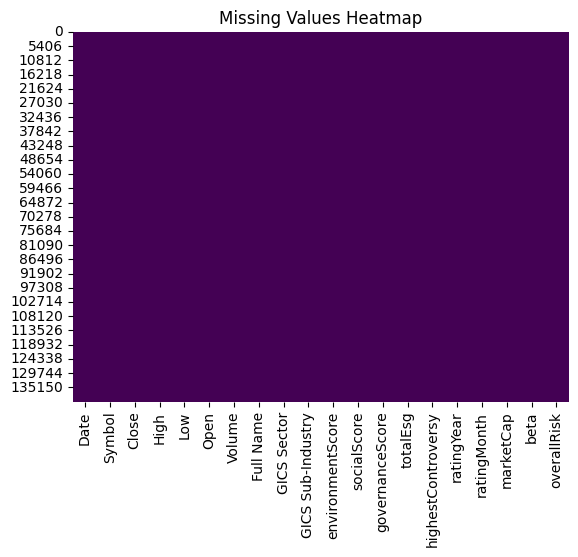

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
# Print all column names to check for the correct spelling
print(data.columns)

Index(['Date', 'Symbol', 'Close', 'High', 'Low', 'Open', 'Volume', 'Full Name',
       'GICS Sector', 'GICS Sub-Industry', 'environmentScore', 'socialScore',
       'governanceScore', 'totalEsg', 'highestControversy', 'ratingYear',
       'ratingMonth', 'marketCap', 'beta', 'overallRisk'],
      dtype='object')


In [10]:
print(data['Symbol'].nunique())  # Should be ~485
print(data['GICS Sector'].value_counts())  # Distribution of sectors (e.g., Tech, Financials)

483
GICS Sector
Industrials               21825
Financials                20079
Information Technology    19206
Health Care               17169
Consumer Discretionary    14550
Consumer Staples          10185
Utilities                  9021
Real Estate                8730
Materials                  7857
Energy                     6402
Communication Services     5529
Name: count, dtype: int64


data range ( from which time ,date)

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data['Date'].min(), data['Date'].max())

2024-01-02 00:00:00 2025-02-28 00:00:00


Explore Key Traits (Feature Engineering Validation)

In [12]:
# Median Volatility: (High - Low) / Open
data['Daily_Volatility'] = (data['High'] - data['Low']) / data['Open']
median_volatility = data.groupby('Symbol')['Daily_Volatility'].median()
print(median_volatility.describe())

count    483.000000
mean       0.019185
std        0.005306
min        0.007712
25%        0.015569
50%        0.017771
75%        0.021590
max        0.046608
Name: Daily_Volatility, dtype: float64


In [14]:
import numpy as np # Import the numpy library

data['Daily_Return'] = data.groupby('Symbol')['Close'].pct_change()
hist_volatility = data.groupby('Symbol')['Daily_Return'].std() * np.sqrt(252)  # Annualize

In [16]:
data['Log_MarketCap'] = np.log(data['marketCap'] + 1)  # Avoid log(0)

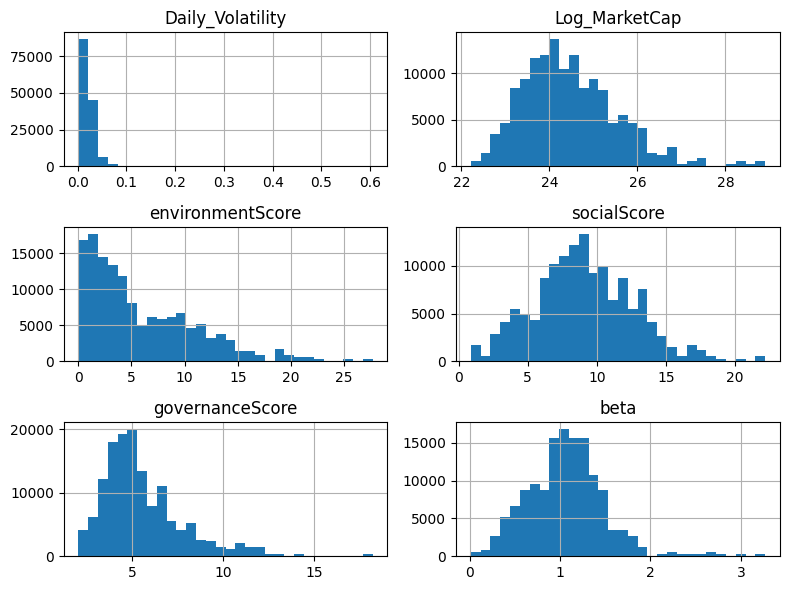

In [74]:
features = ['Daily_Volatility', 'Log_MarketCap'] # Only include existing features

# Check if the other features exist before trying to plot them
for feature in ['environmentScore', 'socialScore', 'governanceScore', 'beta']:
    if feature in data.columns:
        features.append(feature)
    else:
        print(f"Warning: Feature '{feature}' not found in the dataset.")

data[features].hist(figsize=(8,6), bins=30)
plt.tight_layout()
plt.show()

Sector-Based Feature Analysis:
Group features by GICS_Sector to see if certain industries align with Safe, Moderate, or Risky traits:

                        Daily_Volatility  Log_MarketCap
GICS Sector                                            
Communication Services          0.022384      24.969030
Consumer Discretionary          0.023409      24.343350
Consumer Staples                0.019387      24.346512
Energy                          0.022462      24.607144
Financials                      0.019210      24.666276
Health Care                     0.022792      24.563730
Industrials                     0.020424      24.387905
Information Technology          0.025091      24.809656
Materials                       0.021388      23.907240
Real Estate                     0.019743      24.136500
Utilities                       0.019939      24.191334


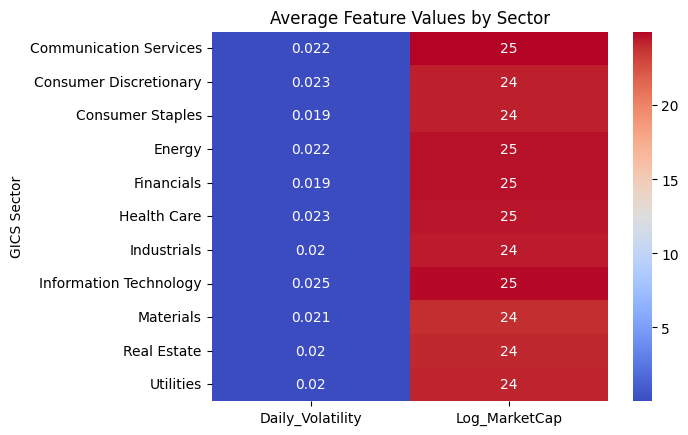

In [21]:
sector_stats = data.groupby('GICS Sector')[features].mean()
print(sector_stats)
sns.heatmap(sector_stats, annot=True, cmap='coolwarm')
plt.title('Average Feature Values by Sector')
plt.show()

Analyze Relationships Between Traits

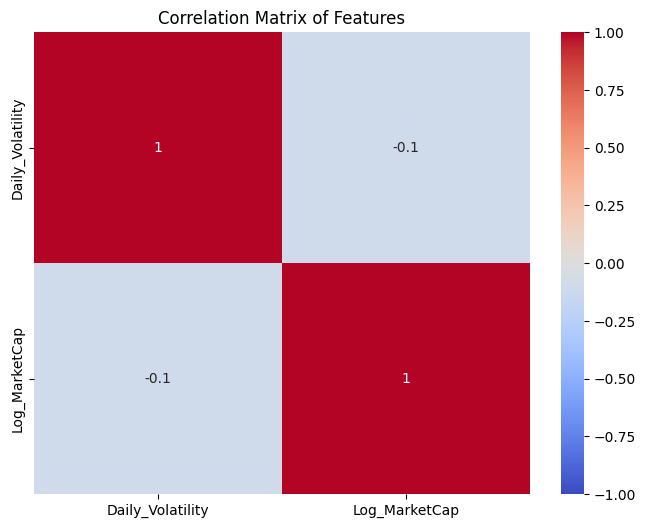

In [24]:
# correction matrix
corr_matrix = data[features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [25]:
#Pair Plots for Key Traits:
#Visualize pairwise relationships for a subset of traits:

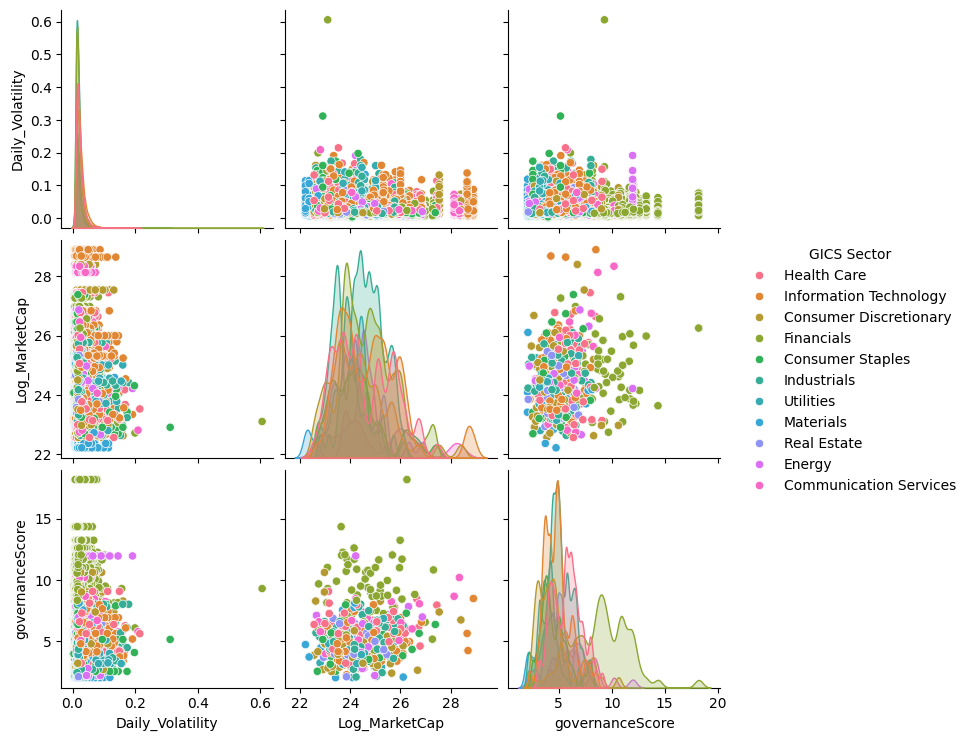

In [27]:
sns.pairplot(data[['Daily_Volatility', 'Log_MarketCap', 'governanceScore', 'GICS Sector']], hue='GICS Sector')
plt.show()

ESG vs. Volatility

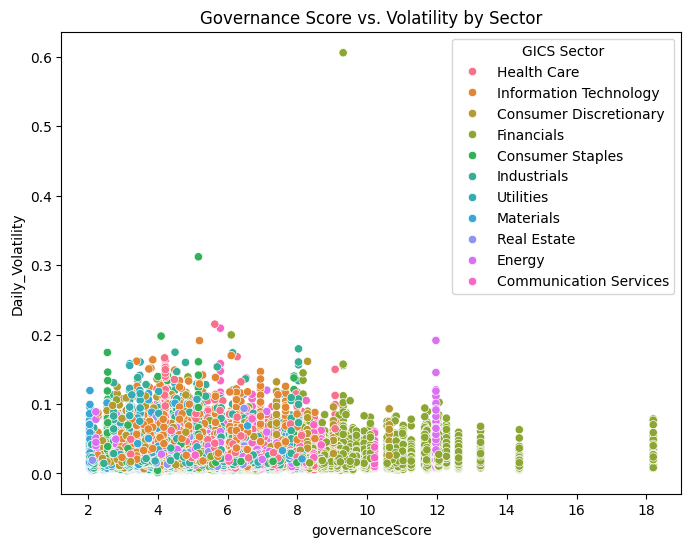

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='governanceScore', y='Daily_Volatility', hue='GICS Sector', data=data) # Changed 'Governancescore' to 'governanceScore'
plt.title('Governance Score vs. Volatility by Sector')
plt.show()

Why: Identifies which traits are most influential for clustering (e.g., volatility and MarketCap likely drive Risky vs. Safe) and confirms ESG’s role in differentiating clusters (e.g., Moderate’s high governance).

# Cluster-Specific EDA (Using Clustered Output)

In [35]:
clustered_data = pd.read_csv('clustered_companies_hierarchical.csv')
print(clustered_data.head())

  Symbol  median_volatility  hist_volatility  mean_momentum  mean_volume_norm  \
0      A           0.019904         0.259917       1.002872          0.000048   
1   AAPL           0.016362         0.232561       1.009006          0.000016   
2   ABBV           0.016931         0.235806       1.007405          0.000015   
3   ABNB           0.022966         0.358470       1.001058          0.000052   
4    ABT           0.014806         0.188297       1.006267          0.000024   

   environmentScore  socialScore  governanceScore  marketCap   beta  \
0              1.14         6.23             3.93  24.307711  1.111   
1              0.55         7.31             8.50  28.905185  1.178   
2              1.78        15.71             8.48  26.645745  0.598   
3              1.30        13.81             8.28  25.196007  1.108   
4              1.81        13.77             6.05  26.217092  0.693   

   highestControversy  GICS_Sector_encoded             GICS_Sector  \
0               

In [36]:
print(clustered_data['Cluster_Hierarchical'].value_counts())

Cluster_Hierarchical
Safe        388
Moderate     67
Risky        28
Name: count, dtype: int64


In [38]:
print(clustered_data.columns)

Index(['Symbol', 'median_volatility', 'hist_volatility', 'mean_momentum',
       'mean_volume_norm', 'environmentScore', 'socialScore',
       'governanceScore', 'marketCap', 'beta', 'highestControversy',
       'GICS_Sector_encoded', 'GICS_Sector', 'Cluster_Hierarchical'],
      dtype='object')


                      median_volatility  marketCap  environmentScore  \
Cluster_Hierarchical                                                   
Moderate                       0.017191  24.592784          1.658358   
Risky                          0.027767  23.146304          7.333214   
Safe                           0.018910  24.552928          6.568067   

                      socialScore  governanceScore      beta  
Cluster_Hierarchical                                          
Moderate                 9.736866         9.003134  1.055134  
Risky                    8.233929         5.517500  1.561643  
Safe                     9.053737         4.950180  1.033067  


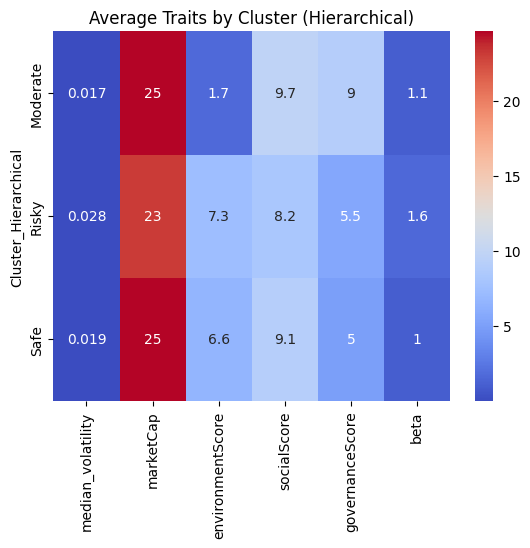

In [41]:
cluster_stats = clustered_data.groupby('Cluster_Hierarchical')[['median_volatility', 'marketCap', 'environmentScore', 'socialScore', 'governanceScore', 'beta']].mean()
print(cluster_stats)
sns.heatmap(cluster_stats, annot=True, cmap='coolwarm')
plt.title('Average Traits by Cluster (Hierarchical)')
plt.show()

Sector Distribution per Cluster:

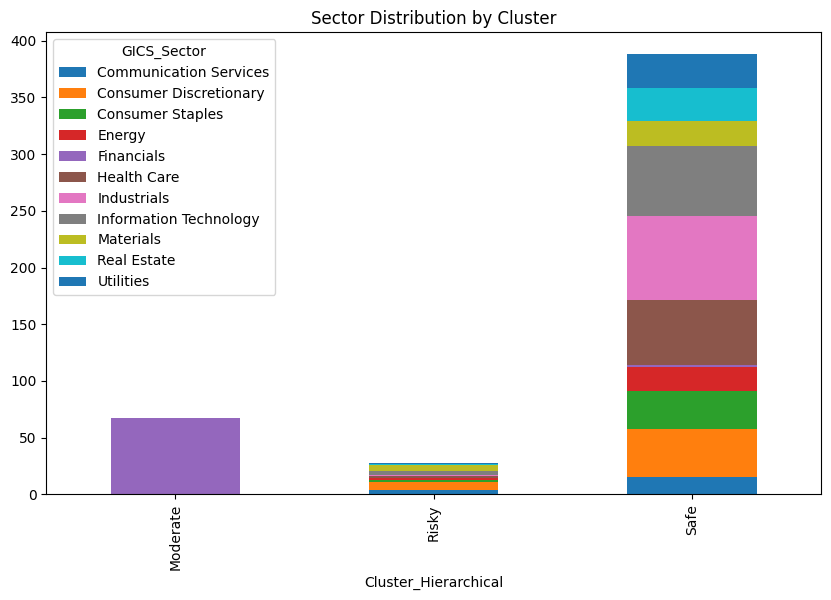

In [43]:
cluster_sectors = clustered_data.groupby(['Cluster_Hierarchical', 'GICS_Sector']).size().unstack().fillna(0)
cluster_sectors.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sector Distribution by Cluster')
plt.show()

In [44]:
for cluster in clustered_data['Cluster_Hierarchical'].unique():
    print(f"\nCluster {cluster}:")
    print(clustered_data[clustered_data['Cluster_Hierarchical'] == cluster][['Symbol', 'GICS_Sector']].head())


Cluster Safe:
  Symbol             GICS_Sector
0      A             Health Care
1   AAPL  Information Technology
2   ABBV             Health Care
3   ABNB  Consumer Discretionary
4    ABT             Health Care

Cluster Moderate:
   Symbol GICS_Sector
5    ACGL  Financials
15    AFL  Financials
16    AIG  Financials
17    AIZ  Financials
18    AJG  Financials

Cluster Risky:
   Symbol             GICS_Sector
14    AES               Utilities
20    ALB               Materials
25   AMCR               Materials
36    APA                  Energy
66    BWA  Consumer Discretionary


# Visualize Patterns

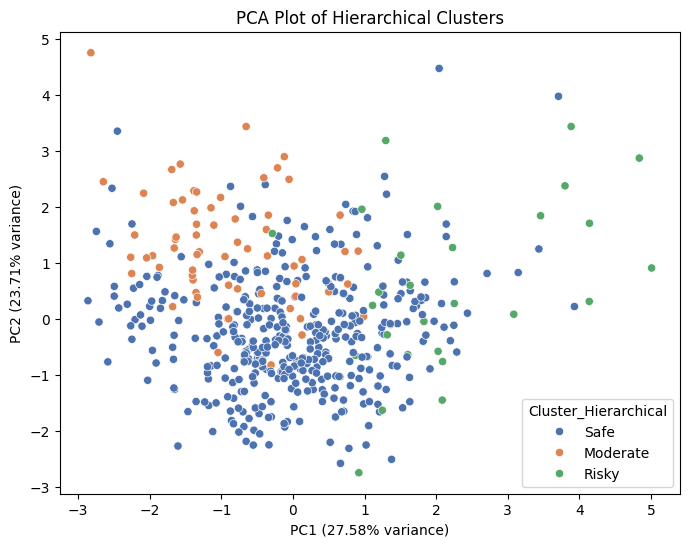

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['median_volatility', 'marketCap', 'environmentScore', 'socialScore', 'governanceScore', 'beta']  # Add others
X = clustered_data[features]
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clustered_data['Cluster_Hierarchical'], palette='deep')
plt.title('PCA Plot of Hierarchical Clusters')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.show()

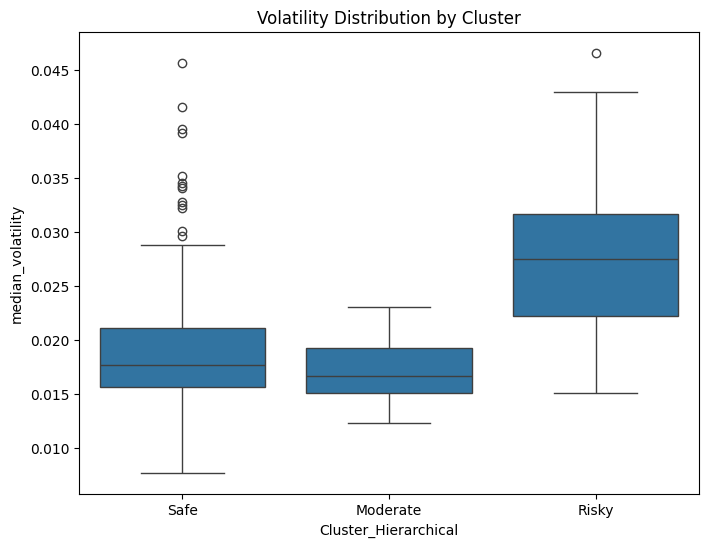

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Hierarchical', y='median_volatility', data=clustered_data)
plt.title('Volatility Distribution by Cluster')
plt.show()

In [49]:
#ESG Score Trends:

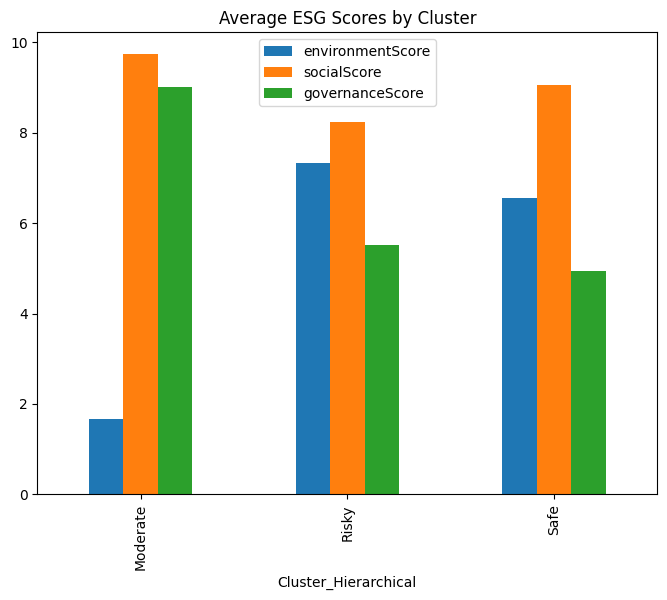

In [50]:
esg_cols = ['environmentScore', 'socialScore', 'governanceScore']
esg_by_cluster = clustered_data.groupby('Cluster_Hierarchical')[esg_cols].mean()
esg_by_cluster.plot(kind='bar', figsize=(8, 6))
plt.title('Average ESG Scores by Cluster')
plt.show()

# Address Outliers and Anomalies

In [52]:
from scipy.stats import zscore
data['Volatility_Z'] = zscore(data['Daily_Volatility'])
outliers = data[abs(data['Volatility_Z']) > 3]
print(outliers[['Symbol', 'Daily_Volatility', 'GICS Sector']])

       Symbol  Daily_Volatility             GICS Sector
78        CCL          0.061715  Consumer Discretionary
306      MRNA          0.162996             Health Care
315      NCLH          0.086451  Consumer Discretionary
375       RCL          0.066478  Consumer Discretionary
462       WBD          0.064488  Communication Services
...       ...               ...                     ...
140501   TSLA          0.072558  Consumer Discretionary
140525    VST          0.083281               Utilities
140527   VTRS          0.064382             Health Care
140531    WBA          0.095014        Consumer Staples
140532    WBD          0.078591  Communication Services

[2461 rows x 3 columns]


In [54]:
dbscan_data = pd.read_csv('clustered_companies_dbscan.csv')
noise = dbscan_data[dbscan_data['Cluster_DBSCAN'] == -1]  # Noise labeled as -1
print(noise[['Symbol', 'median_volatility', 'marketCap', 'GICS_Sector']])
print(noise['GICS_Sector'].value_counts())

Empty DataFrame
Columns: [Symbol, median_volatility, marketCap, GICS_Sector]
Index: []
Series([], Name: count, dtype: int64)


In [55]:
risky_hier = clustered_data[clustered_data['Cluster_Hierarchical'] == 2]['Symbol']
noise_dbscan = dbscan_data[dbscan_data['Cluster_DBSCAN'] == -1]['Symbol']
common = set(risky_hier).intersection(noise_dbscan)
print(f"Common Risky/Noise Companies: {common}")

Common Risky/Noise Companies: set()


In [56]:
#Investment Insights:
#Identify low-volatility, high-MarketCap companies (Safe) for conservative investors:

In [58]:
safe_companies = clustered_data[clustered_data['Cluster_Hierarchical'] == 0][['Symbol', 'median_volatility', 'marketCap']]
print(safe_companies.sort_values('median_volatility').head(10))  # Top 10 steadiest

Empty DataFrame
Columns: [Symbol, median_volatility, marketCap]
Index: []


In [59]:
risky_companies = clustered_data[clustered_data['Cluster_Hierarchical'] == 2][['Symbol', 'median_volatility', 'beta']]
print(risky_companies.sort_values('median_volatility', ascending=False).head(10))

Empty DataFrame
Columns: [Symbol, median_volatility, beta]
Index: []


In [60]:
esg_comparison = clustered_data.groupby('Cluster_Hierarchical')[['environmentScore', 'socialScore', 'governanceScore']].mean()
print(esg_comparison)

                      environmentScore  socialScore  governanceScore
Cluster_Hierarchical                                                
Moderate                      1.658358     9.736866         9.003134
Risky                         7.333214     8.233929         5.517500
Safe                          6.568067     9.053737         4.950180


In [61]:
moderate_financials = clustered_data[(clustered_data['Cluster_Hierarchical'] == 1) & (clustered_data['GICS_Sector'] == 'Financials')]
print(moderate_financials[['Symbol', 'governanceScore', 'median_volatility']].describe())

       governanceScore  median_volatility
count              0.0                0.0
mean               NaN                NaN
std                NaN                NaN
min                NaN                NaN
25%                NaN                NaN
50%                NaN                NaN
75%                NaN                NaN
max                NaN                NaN


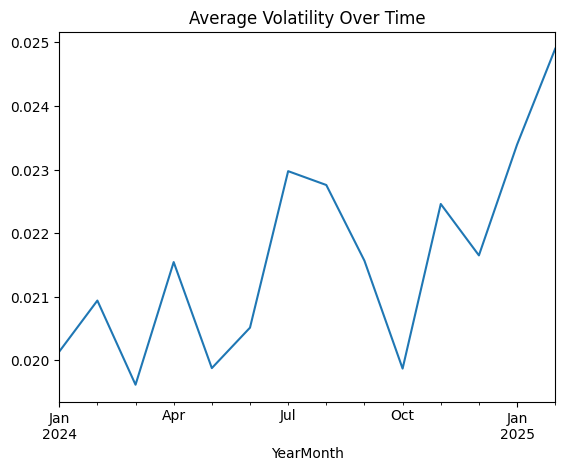

In [62]:
data['YearMonth'] = data['Date'].dt.to_period('M')
volatility_trend = data.groupby('YearMonth')['Daily_Volatility'].mean()
volatility_trend.plot()
plt.title('Average Volatility Over Time')
plt.show()

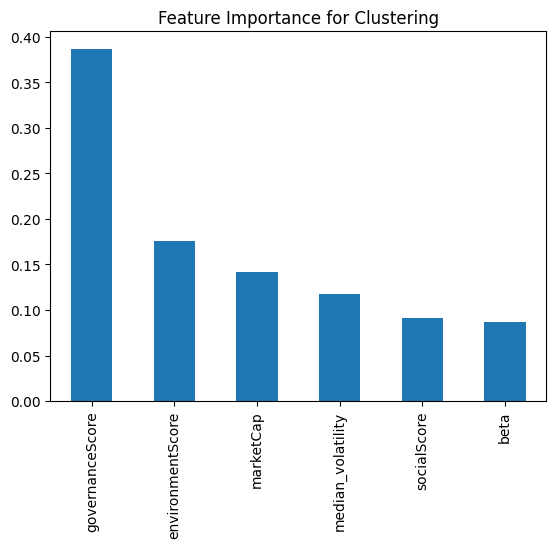

In [63]:
from sklearn.ensemble import RandomForestClassifier
X = clustered_data[features]
y = clustered_data['Cluster_Hierarchical']
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Clustering')
plt.show()

In [64]:
import plotly.express as px
fig = px.scatter(clustered_data, x='median_volatility', y='marketCap', color='Cluster_Hierarchical', hover_data=['Symbol', 'GICS_Sector'])
fig.update_layout(title='Volatility vs. Market Cap by Cluster')
fig.show()

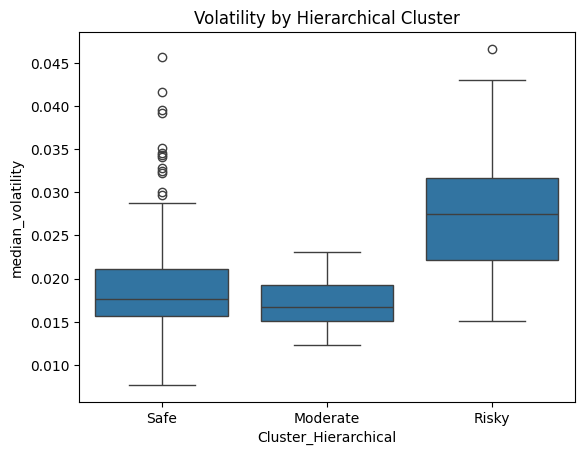

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
clustered_data = pd.read_csv('clustered_companies_hierarchical.csv')
sns.boxplot(x='Cluster_Hierarchical', y='median_volatility', data=clustered_data)
plt.title('Volatility by Hierarchical Cluster')
plt.show()

In [66]:
import pandas as pd
clustered_data = pd.read_csv('clustered_companies_hierarchical.csv')
nvidia_cluster = clustered_data[clustered_data['Symbol'] == 'NVDA'][['Symbol', 'Cluster_Hierarchical']]
print(nvidia_cluster)

    Symbol Cluster_Hierarchical
330   NVDA                 Safe


In [69]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [70]:
import streamlit as st

In [71]:
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from fuzzywuzzy import process

# Set page config
st.set_page_config(page_title="Company Cluster Analysis", layout="wide")

# Load datasets
@st.cache_data
def load_data():
    cluster_df = pd.read_csv('clustered_companies_hierarchical.csv')
    mapping_df = pd.read_csv('company_mapping.csv')
    return cluster_df, mapping_df

# Map cluster numbers to names
cluster_map = {0: 'Safe', 1: 'Moderate', 2: 'Risky'}

# Function to map company name to symbol
def get_symbol(company_name, mapping_df):
    company_name = company_name.lower().strip()
    names = mapping_df['Name'].str.lower().tolist()
    match = process.extractOne(company_name, names)
    if match[1] >= 80:  # 80% similarity threshold
        matched_name = match[0]
        symbol = mapping_df[mapping_df['Name'].str.lower() == matched_name]['Symbol'].iloc[0]
        return symbol
    return None

# Function to identify weaknesses and suggestions
def analyze_company(company_data, cluster_data, cluster_name):
    traits = ['median_volatility', 'Beta', 'Log_MarketCap', 'EnvironmentScore',
              'SocialScore', 'GovernanceScore', 'HighestControversy']
    weaknesses = []
    suggestions = []

    for trait in traits:
        company_value = company_data[trait].iloc[0]
        cluster_mean = cluster_data[trait].mean()
        cluster_std = cluster_data[trait].std()

        # Define weakness thresholds
        if trait in ['median_volatility', 'Beta', 'HighestControversy']:
            # Higher is worse
            if company_value > cluster_mean + cluster_std:
                weaknesses.append(f"{trait}: {company_value:.3f} (Cluster {cluster_name} avg: {cluster_mean:.3f})")
                if trait == 'median_volatility':
                    suggestions.append("Reduce stock volatility by diversifying revenue streams or stabilizing supply chains.")
                elif trait == 'Beta':
                    suggestions.append("Lower market sensitivity by focusing on stable product lines or hedging strategies.")
                elif trait == 'HighestControversy':
                    suggestions.append("Address controversies by improving public relations and transparency.")
        elif trait in ['Log_MarketCap', 'EnvironmentScore', 'SocialScore', 'GovernanceScore']:
            # Lower is worse
            if company_value < cluster_mean - cluster_std:
                weaknesses.append(f"{trait}: {company_value:.3f} (Cluster {cluster_name} avg: {cluster_mean:.3f})")
                if trait == 'Log_MarketCap':
                    suggestions.append("Increase market presence through strategic growth or acquisitions.")
                elif trait == 'EnvironmentScore':
                    suggestions.append("Enhance environmental practices, e.g., reduce emissions or adopt sustainable materials.")
                elif trait == 'SocialScore':
                    suggestions.append("Improve social policies, e.g., better worker benefits or community engagement.")
                elif trait == 'GovernanceScore':
                    suggestions.append("Strengthen governance by improving board transparency and ethical practices.")

    return weaknesses, suggestions

# Function to create comparison plot
def plot_comparison(company_data, cluster_data, company_name, cluster_name):
    traits = ['median_volatility', 'Beta', 'Log_MarketCap', 'EnvironmentScore',
              'SocialScore', 'GovernanceScore', 'HighestControversy']
    company_values = [company_data[trait].iloc[0] for trait in traits]
    cluster_means = [cluster_data[trait].mean() for trait in traits]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=traits, y=company_values, name=f"{company_name}", marker_color='red'))
    fig.add_trace(go.Bar(x=traits, y=cluster_means, name=f"{cluster_name} Cluster Average", marker_color='blue', opacity=0.5))

    fig.update_layout(
        title=f"{company_name} vs. {cluster_name} Cluster Averages",
        xaxis_title="Traits",
        yaxis_title="Values",
        barmode='group',
        xaxis_tickangle=-45,
        height=600
    )
    return fig

# Streamlit app
st.title("Company Cluster Analysis")
st.markdown("Enter a company name (e.g., Nvidia, Apple) to see its cluster (Safe, Moderate, Risky), weaknesses, and improvement suggestions.")

# Input
company_input = st.text_input("Enter Company Name (e.g., Nvidia)", "")

if company_input:
    cluster_df, mapping_df = load_data()

    # Map company name to symbol
    symbol = get_symbol(company_input, mapping_df)

    if symbol:
        # Check if company exists
        company_data = cluster_df[cluster_df['Symbol'] == symbol]

        if not company_data.empty:
            # Get cluster
            cluster_num = company_data['Cluster_Hierarchical'].iloc[0]
            cluster_name = cluster_map.get(cluster_num, "Unknown")

            # Display cluster
            st.header(f"Cluster for {company_input}")
            st.subheader(f"{company_input} is in the {cluster_name} cluster")

            # Get cluster data for comparison
            cluster_data = cluster_df[cluster_df['Cluster_Hierarchical'] == cluster_num]

            # Analyze weaknesses and suggestions
            weaknesses, suggestions = analyze_company(company_data, cluster_data, cluster_name)

            # Display weaknesses
            st.header("Where the Company Lacks")
            if weaknesses:
                for w in weaknesses:
                    st.write(f"- {w}")
            else:
                st.write("No significant weaknesses compared to cluster average.")

            # Display improvement suggestions
            st.header("Suggestions for Improvement")
            if suggestions:
                for s in suggestions:
                    st.write(f"- {s}")
            else:
                st.write("No specific improvements needed based on current data.")

            # Plot comparison
            st.header("Trait Comparison")
            fig = plot_comparison(company_data, cluster_data, company_input, cluster_name)
            st.plotly_chart(fig, use_container_width=True)

            # Display company details
            st.header("Company Details")
            traits = ['median_volatility', 'Beta', 'Log_MarketCap', 'EnvironmentScore',
                      'SocialScore', 'GovernanceScore', 'HighestControversy', 'GICS_Sector']
            st.write(company_data[traits])
        else:
            st.error(f"Company symbol '{symbol}' not found in the clustering dataset. Please try another company.")
    else:
        st.error(f"Company name '{company_input}' not found. Try a different name (e.g., Nvidia, Apple, Aflac) or check spelling.")
else:
    st.info("Please enter a company name to see results.")

2025-04-17 16:10:13.559 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 16:10:13.571 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-17 16:10:13.583 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 16:10:14.154 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-17 16:10:14.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 16:10:14.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 16:10:14.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runnin